In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset= pd.read_csv("Ecommerce Customers.csv")
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


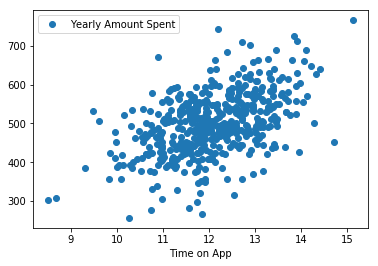

In [29]:
dataset.plot(x='Time on App',y='Yearly Amount Spent',style='o')

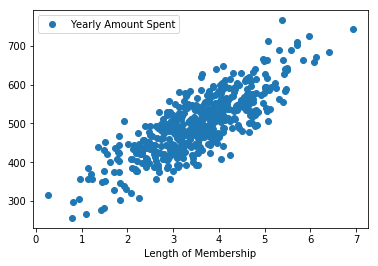

In [7]:
dataset.plot(x='Length of Membership',y='Yearly Amount Spent',style='o')

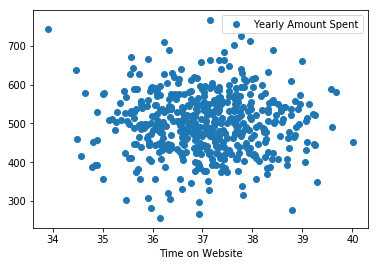

In [8]:
dataset.plot(x='Time on Website',y='Yearly Amount Spent',style='o')

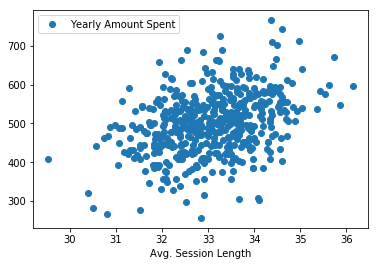

In [9]:
dataset.plot(x='Avg. Session Length',y='Yearly Amount Spent',style='o')

In [16]:
x=dataset[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership' ]]
y=dataset['Yearly Amount Spent']

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2)

In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
print(regressor.intercept_)

-1036.5440006409458


In [22]:
print(regressor.coef_)

[25.40815659 38.59460757  0.35164211 61.73358316]


In [23]:
y_pred=regressor.predict(X_test)

In [25]:
df=pd.DataFrame({'actual': Y_test , 'predicted':y_pred})
df

,actual,predicted
108,570.451726,556.340725
419,483.543194,478.401110
432,486.947054,509.584953
398,537.825282,543.117964
360,444.576144,442.075003
18,452.315675,456.295461
340,501.122492,519.233423
21,419.938775,421.146289
304,494.687156,498.080740
107,378.330907,390.593613


In [26]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
print('mean square error',mean_squared_error(Y_test,y_pred))
print('root mean squared error',np.sqrt(mean_squared_error(Y_test,y_pred)))
print('r_2 statistic: %.2f' % r2_score(Y_test,y_pred))

mean square error 92.01304371675047
root mean squared error 9.592342973265211
r_2 statistic: 0.99


In [33]:
print(regressor.predict([[30,12,39,4]]))

[449.48436277]
